# Project 1. Bank Loans

1. Alejandro Herrera
2. Jair Mijangos
3. Arturo Padilla
4. Daniel Ortiz-Rubio


In [34]:
#Dependencies
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib as mplt
import datetime

#Import file
file = "Copia de Tabla_Proyecto_1.xlsx"
data_atrasos = pd.read_excel(file)
data_atrasos.head()

,PAIS,Estado,SUCURSAL,FOLIO,MaxAtraso_1601,MaxAtraso_1602,MaxAtraso_1603,MaxAtraso_1604,MaxAtraso_1605,MaxAtraso_1606,...,MaxAtraso_1907,MaxAtraso_1908,MaxAtraso_1909,MaxAtraso_1910,MaxAtraso_1911,MaxAtraso_1912,No_Creditos,DT_MINFECHASURT,Limite de Credito,Unnamed: 55
0,1,10,1512,4898,0,0,0,0,0,0,...,1,2,2,0,0,0,2 pedidos,2014-05-04,40631,NaN
1,1,20,6310,11627,0,0,0,1,2,3,...,0,1,2,3,4,5,3+ pedidos,2010-10-30,70333,NaN
2,1,30,1422,11812,-2,-1,-1,-1,-1,-1,...,0,0,1,1,0,0,2 pedidos,2012-02-07,53937,NaN
3,2,40,6669,17862,-2,-1,-2,-1,-2,-1,...,7,0,0,-1,-3,-6,3+ pedidos,2014-07-29,82353,NaN
4,2,50,6508,10095,0,0,0,0,0,-1,...,0,0,0,0,0,0,3+ pedidos,2015-10-30,89239,NaN


In [35]:
#Asign Country Name depending on de numer i the 'Pais' column
paises = {"PAIS":pd.Series([1,2,3,4]),"NOM_PAIS":pd.Series(["México","Colombia","Costa Rica","Uruguay"])}



#Creating data frame
paises_df = pd.DataFrame(paises)
paises_df

,PAIS,NOM_PAIS
0,1,México
1,2,Colombia
2,3,Costa Rica
3,4,Uruguay


In [36]:
#Adding country name to de original data frame  
new_table = pd.merge(data_atrasos, paises_df, on='PAIS', how='left')

#Extracting "Year" from a date
new_table["YEAR"] = pd.DatetimeIndex(new_table["DT_MINFECHASURT"]).year

#Drop unwanted column from data frame
new_table=new_table.drop(columns=['Unnamed: 55'])
new_table.head()

,PAIS,Estado,SUCURSAL,FOLIO,MaxAtraso_1601,MaxAtraso_1602,MaxAtraso_1603,MaxAtraso_1604,MaxAtraso_1605,MaxAtraso_1606,...,MaxAtraso_1908,MaxAtraso_1909,MaxAtraso_1910,MaxAtraso_1911,MaxAtraso_1912,No_Creditos,DT_MINFECHASURT,Limite de Credito,NOM_PAIS,YEAR
0,1,10,1512,4898,0,0,0,0,0,0,...,2,2,0,0,0,2 pedidos,2014-05-04,40631,México,2014
1,1,20,6310,11627,0,0,0,1,2,3,...,1,2,3,4,5,3+ pedidos,2010-10-30,70333,México,2010
2,1,30,1422,11812,-2,-1,-1,-1,-1,-1,...,0,1,1,0,0,2 pedidos,2012-02-07,53937,México,2012
3,2,40,6669,17862,-2,-1,-2,-1,-2,-1,...,0,0,-1,-3,-6,3+ pedidos,2014-07-29,82353,Colombia,2014
4,2,50,6508,10095,0,0,0,0,0,-1,...,0,0,0,0,0,3+ pedidos,2015-10-30,89239,Colombia,2015


#Rename column headers for dates
#We decided not to use this part of the code but we still think it is usefull

#current = 0
month = 0
year = 16
for col in new_table.columns:
    if current > 3 and current < 52:
        if month == 12:
            year = year + 1
            month = 1
        else:
            month = month + 1
        if month < 10:
            newName = f"0{month}/{year}"
            new_table.rename(columns = {col:newName}, inplace = True)
        else:
            newName = f"{month}/{year}"
            new_table.rename(columns = {col:newName}, inplace = True)
        current = current + 1
    else:
        current = current + 1
new_table

In [37]:
#Count number of loans per country
countryCount=new_table["NOM_PAIS"].value_counts()
#Creating Data Frame
countryCount_df=pd.DataFrame(countryCount)
#Calculating the percent of loans represented by country 
countryCountPercent=round(countryCount_df['NOM_PAIS']/len(new_table),4)
#Adding column into data frame and renaming columns
countryCount_df['Percent']=countryCountPercent
countryCount_df=countryCount_df.rename(columns={'NOM_PAIS':'Aproved Loans'})
countryCount_df.index.name = 'Country'
countryCount_df

,Aproved Loans,Percent
Country,,
México,590,0.3272
Colombia,495,0.2745
Costa Rica,426,0.2363
Uruguay,292,0.1620


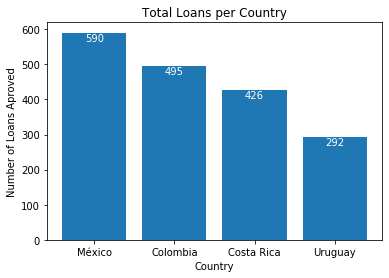

In [38]:
#Creating a bar chart representing the total of loans aproved by cpuntry
loans=(countryCount_df['Aproved Loans'].values)
countryList = (countryCount_df.index)
bars=plt.bar(countryList,loans)
#Giving format to chart
plt.xlabel('Country')
plt.ylabel('Number of Loans Aproved')
plt.title('Total Loans per Country')

def label(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2.,height,int(height),color='white',
                ha='center', va='top')
label(bars)
plt.savefig("Total Loans per Country.png")

In [39]:
sumLimit = new_table.groupby(["NOM_PAIS"])["Limite de Credito"].sum()
sumLimit_df=pd.DataFrame(sumLimit)
sumPercent=round(sumLimit_df['Limite de Credito']/new_table["Limite de Credito"].sum(),4)
sumLimit_df['Credit Limit Percent']=sumPercent
sumLimit_df=sumLimit_df.rename(columns={'Limite de Credito':'Total Amount Lent'})
sumLimit_df.index.name = 'Country'
sumLimit_df

,Total Amount Lent,Credit Limit Percent
Country,,
Colombia,26546902,0.2901
Costa Rica,15826485,0.1730
México,28457477,0.3110
Uruguay,20676009,0.2260


In [40]:
countryAnalysis_df=pd.merge(countryCount_df, sumLimit_df, on='Country', how='inner')
numFormat= {'Percent':'{:.2%}', 'Total Amount Lent': '${0:,.0f}', 'Credit Limit Percent': '{:.2%}'}
countryAnalysis_df.style.format(numFormat)

,Aproved Loans,Percent,Total Amount Lent,Credit Limit Percent
Country,,,,
México,590,32.72%,"$28,457,477",31.10%
Colombia,495,27.45%,"$26,546,902",29.01%
Costa Rica,426,23.63%,"$15,826,485",17.30%
Uruguay,292,16.20%,"$20,676,009",22.60%


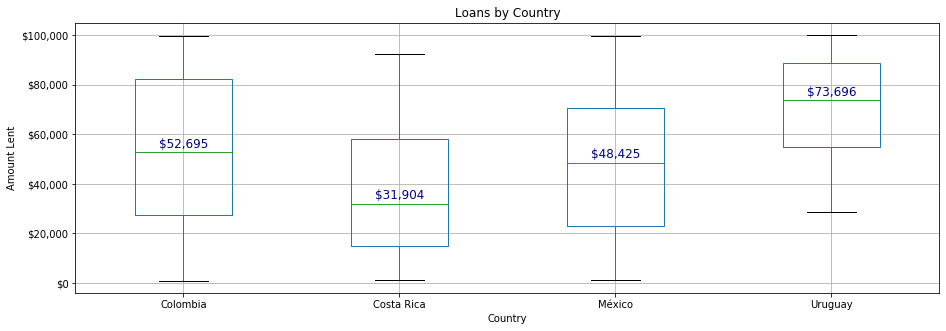

In [41]:
#Boxplot with labels
#Create box plot
amountLentPlot = new_table.boxplot("Limite de Credito", by="NOM_PAIS",figsize=(15,5))

#Get median values for labels
medianValues = new_table.groupby(["NOM_PAIS"])["Limite de Credito"].median()

#Add axis labels and plot title
plt.xlabel('Country')
plt.ylabel('Amount Lent')
plt.title('Loans by Country')

#Give currency format to y axis values
amountLentPlot.yaxis.set_major_formatter(mplt.ticker.StrMethodFormatter('${x:,.0f}'))

#Loop over each median label value
for tick in range(len(medianValues)):
    #Give currency format to label values
    labelVal = '${0:,.0f}'.format(medianValues[tick])
    #Add labels to median values 
    amountLentPlot.text(tick + 1, 
                        medianValues[tick] + 2000, 
                        labelVal, 
                        horizontalalignment = 'center', 
                        size = 'large', 
                        color = 'darkblue'
                       )
plt.grid(True)
plt.suptitle("")
plt.savefig("Amount Lent.png")

In [42]:
tpruebaM = new_table[new_table["NOM_PAIS"]=="México"]
tpruebaC = new_table[new_table["NOM_PAIS"]=="Colombia"]
tpruebaU = new_table[new_table["NOM_PAIS"]=="Uruguay"]

In [43]:
#New Column
Meses = ["Malos_1601","Malos_1602","Malos_1603","Malos_1604","Malos_1605","Malos_1606",
        "Malos_1607","Malos_1608","Malos_1609","Malos_1610","Malos_1611","Malos_1612",
        "Malos_1701","Malos_1702","Malos_1703","Malos_1704","Malos_1705","Malos_1706",
         "Malos_1707","Malos_1708","Malos_1709","Malos_1710","Malos_1711","Malos_1712",
         "Malos_1801","Malos_1802","Malos_1803","Malos_1804","Malos_1805","Malos_1806",
         "Malos_1807","Malos_1808","Malos_1809","Malos_1810","Malos_1811","Malos_1812",
         "Malos_1901","Malos_1902","Malos_1903","Malos_1904","Malos_1905","Malos_1906",
         "Malos_1907","Malos_1908","Malos_1909","Malos_1910","Malos_1911","Malos_1912"]

## For Mexico

In [44]:
#Counting non-payment Clients 
conteo_malosM=[]

for col in tpruebaM.columns:
    if col.startswith("MaxAtraso_"):
        t2pruebaM=tpruebaM[tpruebaM[col]!="."]
        conteo_malosM.append(len(t2pruebaM[t2pruebaM[col].astype(int) > 0]))

In [45]:
#Counting Total Active Clients
conteo_totalM=[]
for col in tpruebaM.columns:
    if col.startswith("MaxAtraso_"):
        t2pruebaM=tpruebaM[tpruebaM[col]!="."]
        conteo_totalM.append(len(t2pruebaM[col]))

In [46]:
Meses_M=pd.DataFrame(Meses)
#Adding columns to an existing Data frame
Meses_M["Ctes_Impago"] = conteo_malosM
Meses_M["Ctes_Totales"] = conteo_totalM
#Calculating Percentages
Meses_M["BCP"]=round(Meses_M["Ctes_Impago"]/Meses_M["Ctes_Totales"],4)
format_1 = {"BCP":'{:.2%}'}
#Renaming columns titles
Meses_M=Meses_M.rename(columns={0:"YR-MT"})
Meses_M.head().style.format(format_1)

,YR-MT,Ctes_Impago,Ctes_Totales,BCP
0,Malos_1601,0,590,0.00%
1,Malos_1602,9,590,1.53%
2,Malos_1603,24,589,4.07%
3,Malos_1604,40,589,6.79%
4,Malos_1605,58,587,9.88%


## For Colombia

In [47]:
#Counting non-payment Clients 
conteo_malosC=[]
for col in tpruebaC.columns:
    if col.startswith("MaxAtraso_"):
        t2pruebaC=tpruebaC[tpruebaC[col]!="."]
        conteo_malosC.append(len(t2pruebaC[t2pruebaC[col].astype(int) > 0]))

In [48]:
#Counting Total Active Clients
conteo_totalC=[]
for col in tpruebaC.columns:
    if col.startswith("MaxAtraso_"):
        t2pruebaC=tpruebaC[tpruebaC[col]!="."]
        conteo_totalC.append(len(t2pruebaC[col]))

In [49]:
#For Colombia
Meses_C=pd.DataFrame(Meses)
#Adding columns to an existing Data frame
Meses_C["Ctes_Impago"] = conteo_malosC
Meses_C["Ctes_Totales"] = conteo_totalC
#Calculating Percentages 
Meses_C["BCP"]=round(Meses_C["Ctes_Impago"]/Meses_C["Ctes_Totales"],4)
format_1 = {"BCP":'{:.2%}'}
#Renaming columns titles
Meses_C=Meses_C.rename(columns={0:"YR-MT"})
Meses_C.head().style.format(format_1)

,YR-MT,Ctes_Impago,Ctes_Totales,BCP
0,Malos_1601,0,495,0.00%
1,Malos_1602,14,493,2.84%
2,Malos_1603,32,494,6.48%
3,Malos_1604,42,494,8.50%
4,Malos_1605,54,493,10.95%


## For Uruguay

In [50]:
#Counting non-payment Clients 
conteo_malosU=[]
for col in tpruebaU.columns:
    if col.startswith("MaxAtraso_"):
        t2pruebaU=tpruebaU[tpruebaU[col]!="."]
        conteo_malosU.append(len(t2pruebaU[t2pruebaU[col].astype(int) > 0]))

In [51]:
#Counting Total Active Clients
conteo_totalU=[]
for col in tpruebaU.columns:
    if col.startswith("MaxAtraso_"):
        t2pruebaU=tpruebaU[tpruebaU[col]!="."]
        conteo_totalU.append(len(t2pruebaU[col]))

In [52]:
#For Uruguay
Meses_U=pd.DataFrame(Meses)
#Adding columns to an existing Data frame
Meses_U["Ctes_Impago"] = conteo_malosU
Meses_U["Ctes_Totales"] = conteo_totalU
#Calculating Percentages 
Meses_U["BCP"]=round(Meses_U["Ctes_Impago"]/Meses_U["Ctes_Totales"],4)
format_1 = {"BCP":'{:.2%}'}
#Renaming columns titles
Meses_U=Meses_U.rename(columns={0:"YR-MT"})
Meses_U.head().style.format(format_1)

,YR-MT,Ctes_Impago,Ctes_Totales,BCP
0,Malos_1601,0,292,0.00%
1,Malos_1602,6,292,2.05%
2,Malos_1603,20,292,6.85%
3,Malos_1604,22,292,7.53%
4,Malos_1605,35,291,12.03%


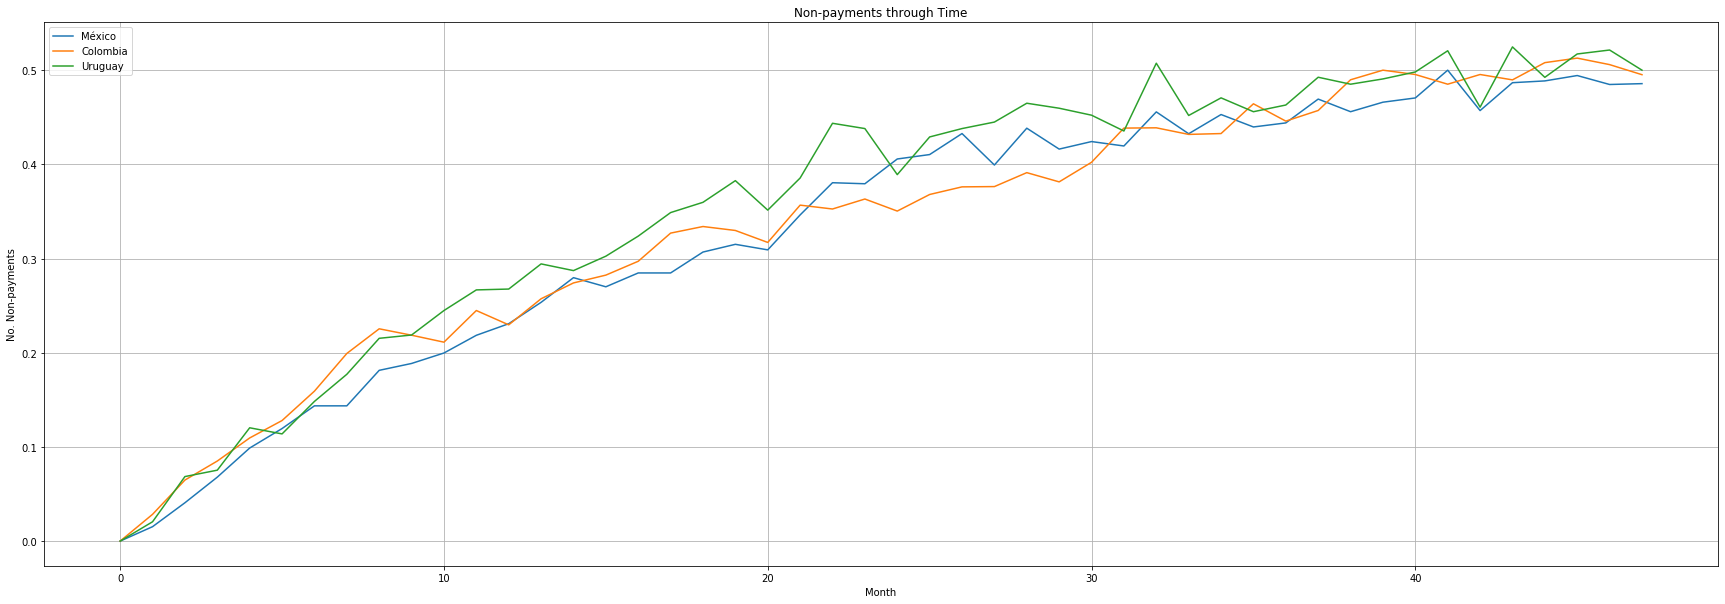

In [54]:
#
plt.plot(Meses_M.index,Meses_M["BCP"],label="México")
plt.plot(Meses_C.index,Meses_C["BCP"],label="Colombia")
plt.plot(Meses_U.index,Meses_U["BCP"],label="Uruguay")
plt.legend(loc="best")
plt.rcParams["figure.figsize"]=[30,10]
plt.xlabel('Month')
plt.ylabel('No. Non-payments')
plt.title('Non-payments through Time')
plt.grid(True)
plt.savefig("Non-payments through Time.png")

In [55]:
#Add new column Mes Otorgado to excel file
new_table["Mes Otorgado"] = pd.DatetimeIndex(new_table["DT_MINFECHASURT"]).month
#Get the amount of credit granted in every country by month independently of year
months = new_table.groupby(['NOM_PAIS'])['Mes Otorgado'].value_counts()
registry=pd.DataFrame(months)
registry=registry.rename(columns={'Mes Otorgado':'Altas'})
registry=registry.sort_values(['NOM_PAIS', 'Mes Otorgado'], ascending=[False, True])
registry

Altas
NOM_PAIS   Mes Otorgado       
Uruguay    1                23
           2                16
           3                29
           4                20
           5                21
           6                21
           7                25
           8                33
           9                32
           10               30
           11               24
           12               18
México     1                45
           2                32
           3                60
           4                48
           5                49
           6                42
           7                54
           8                60
           9                59
           10               48
           11               50
           12               43
Costa Rica 1                34
           2                29
           3                25
           4                20
           5                29
           6                38
           7                38
           8                48
           9                38
           10               47
           11               45
           12               35
Colombia   1                39
           2                34
           3                32
           4                30
           5                39
           6                39
           7                39
           8                49
           9                49
           10               49
           11               39
           12               57

In [56]:
colombia = months["Colombia"]
colombia=colombia.sort_index()
mex = months["México"]
mex=mex.sort_index()
urug = months["Uruguay"]
urug=urug.sort_index()
costa = months["Costa Rica"]
costa=costa.sort_index()

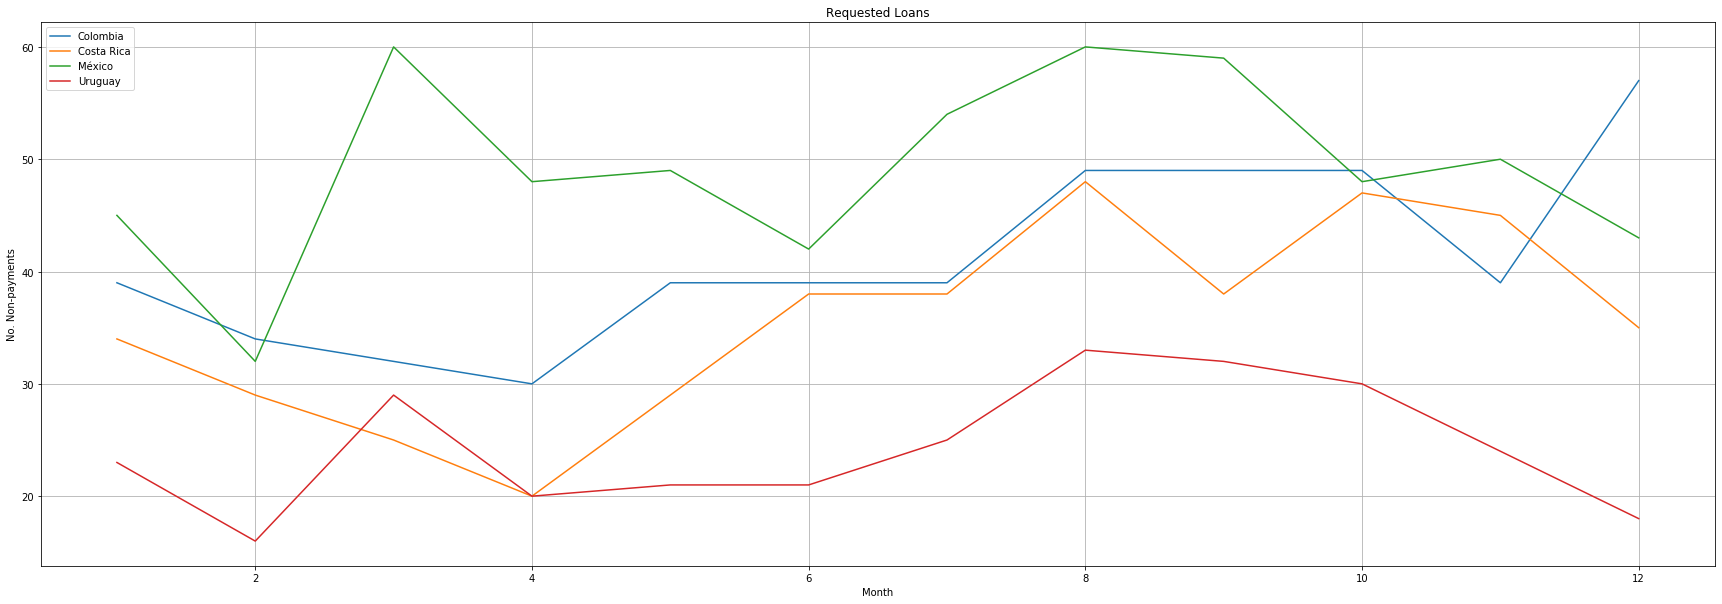

In [57]:
plt.plot(colombia.index,colombia,label="Colombia")
plt.plot(costa.index,costa,label="Costa Rica")
plt.plot(mex.index,mex,label="México")
plt.plot(urug.index,urug,label="Uruguay")
plt.legend(loc="best")
plt.rcParams["figure.figsize"]=[20,20]
plt.xlabel('Month')
plt.ylabel('No. Non-payments')
plt.title('Requested Loans')
plt.grid(True)
plt.savefig("Requested Loans.png")

In [58]:
dataLoans = new_table['No_Creditos']

numLoans = [(x.split()[0]) for x in dataLoans]
numLoans_df=pd.DataFrame(numLoans)
numLoans_df[0].value_counts()


3+    1035
2      465
1      303
Name: 0, dtype: int64

In [59]:
m=pd.DataFrame(new_table.groupby(['NOM_PAIS'])['No_Creditos'].value_counts())
m

No_Creditos
NOM_PAIS   No_Creditos             
Colombia   3+ pedidos           289
           2 pedidos            114
           1 pedido              92
Costa Rica 3+ pedidos           249
           2 pedidos            110
           1 pedido              67
México     3+ pedidos           339
           2 pedidos            153
           1 pedido              98
Uruguay    3+ pedidos           158
           2 pedidos             88
           1 pedido              46